In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pickle
import os
from numpy.random import RandomState


# Load the Gaussian Process model from a .pkl file
Pgp_list = []
_path = 'C:/Users/Merlin/Documents/GitHub/BayesianOptimization/Population_models'
gp_files = [f for f in os.listdir(_path) if f.startswith('GP') and f.endswith('.pkl')]
gp_files.sort(key=lambda x: int(x[2:-4]))  # Sort files by number
for gp_file in gp_files:
    with open(os.path.join(_path, gp_file), 'rb') as file:
        Pgp_list.append(pickle.load(file))

In [ ]:
from __future__ import annotations
from typing import TYPE_CHECKING, Any, Literal, NoReturn
import numpy as np
import warnings

if TYPE_CHECKING:
    from collections.abc import Callable, Sequence

    from numpy.typing import NDArray

    Float = np.floating[Any]

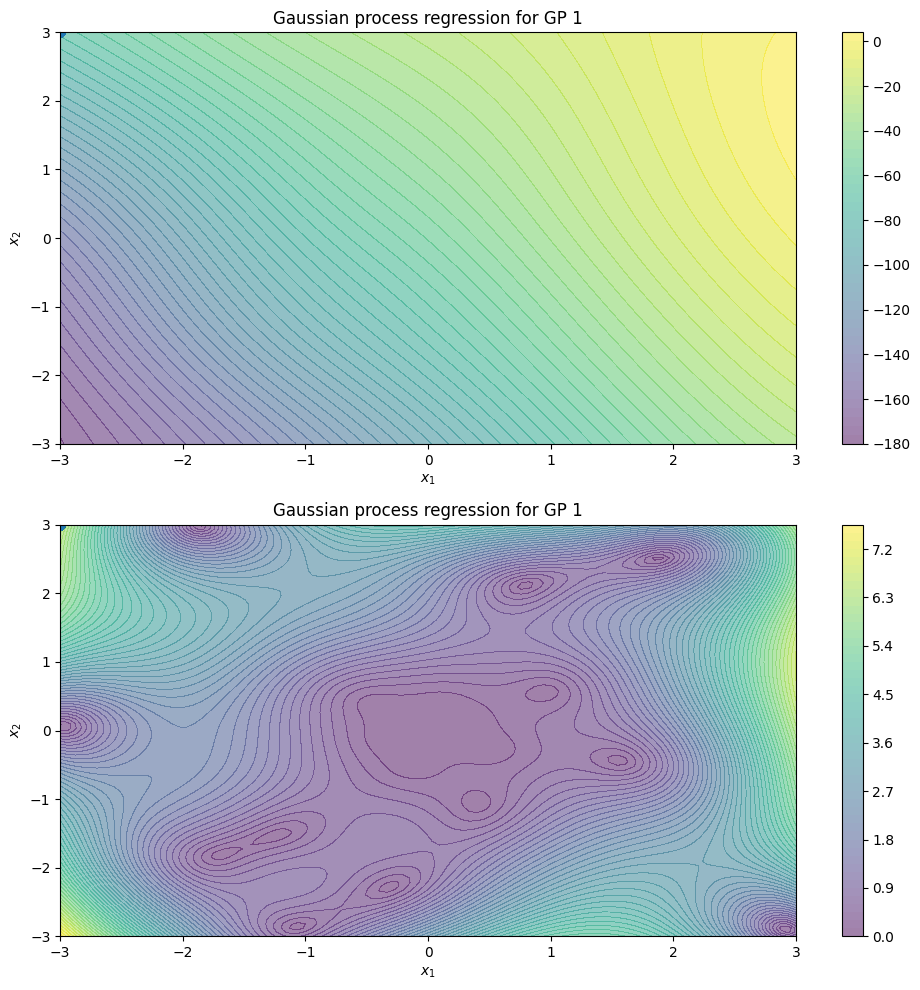

In [15]:
import numpy as np

random_state = RandomState()
x_tries = random_state.uniform([-3, 3], [-3, 3], size=(10000, 2))

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

gps = Pgp_list[0]
# Create a mesh grid for plotting
X1, X2 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
X_grid = np.column_stack([X1.ravel(), X2.ravel()])
mean_grid, std_grid = gps[1].predict(X_grid, return_std=True)

# Determine the position in the 2x2 grid
ax = axs[0]  # Get the appropriate subplot axis
contour_mean = ax.contourf(X1, X2, mean_grid.reshape(X1.shape), levels=50, cmap='viridis', alpha=0.5)
ax.scatter(x_tries[:,0], x_tries[:,1], label="Observations", alpha=0.5)
ax.set_title(f"Gaussian process regression for GP {i+1}")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
fig.colorbar(contour_mean, ax=ax)  # Add colorbar for the first plot

ax = axs[1]  # Get the appropriate subplot axis
contour_std = ax.contourf(X1, X2, std_grid.reshape(X1.shape), levels=50, cmap='viridis', alpha=0.5)
ax.scatter(x_tries[:,0], x_tries[:,1], label="Observations", alpha=0.5)
ax.set_title(f"Gaussian process regression for GP {i+1}")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
fig.colorbar(contour_std, ax=ax)  # Add colorbar for the second plot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plots